### Analysis of AgO  Ag 3d+MNN coincidences

experiment in KW26/2019


# Energy calibration still FAKE



### load settings and data (path, filenames, flags, binsize)

In [1]:
import sys, os
# own libs from pycoin folder one level above
pycoinpath='../'
sys.path.append(pycoinpath) # add libcoin path here (if not installed as module)
#
ScriptFolderAg3d = 'Ag3dMNN_coincidences_scripts/'
ScriptFolderAgO = 'AgO_coins_scripts/'

basepath        = '../testdata'

datafilename='AgO_Ag3dMNN_KW26_ALL_analysed.h5'
picprefix   ='AgO_Ag3dMNN_KW26_fullrun'

Ephot        = 850 #eV
dxy          = [.2,.08]       # bin resolution in A1,A2 coord.
EkinFermi_xy = [693.77+150,695.06+150] # kinetic Energy of Fermi for calibration

flag_savefig=True
flag_save2dplot=True

### load settings and data
exec(open(ScriptFolderAgO+"AgO_Ag3dMNN_Load_settings_and_data.py").read())


 finished loading.


## Analysis

### Select dataset & plot overview

In [2]:
# Ag3dMNN_defineROIframes.py
exec(open(ScriptFolderAg3d+"Ag3dMNN_defineROIframes.py").read())

# Figure 4: measured, accidental, true coincidences maps

# Figure X: true map with spectra at side
( Fig.X not in paper )

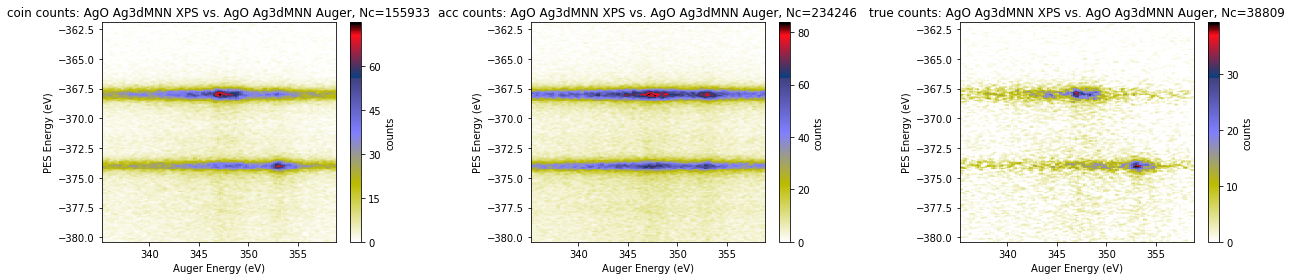

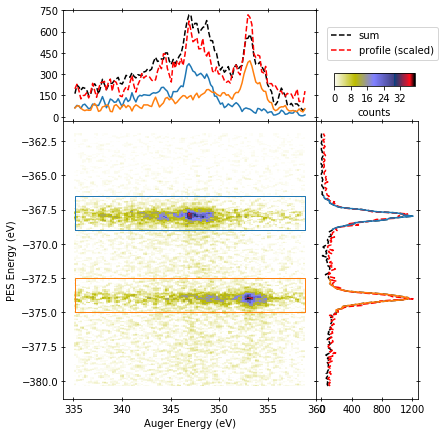

In [3]:
cmap='gist_stern_r'
exec(open(ScriptFolderAg3d+"Ag3dMNN_plotOverviewMaps.py").read())

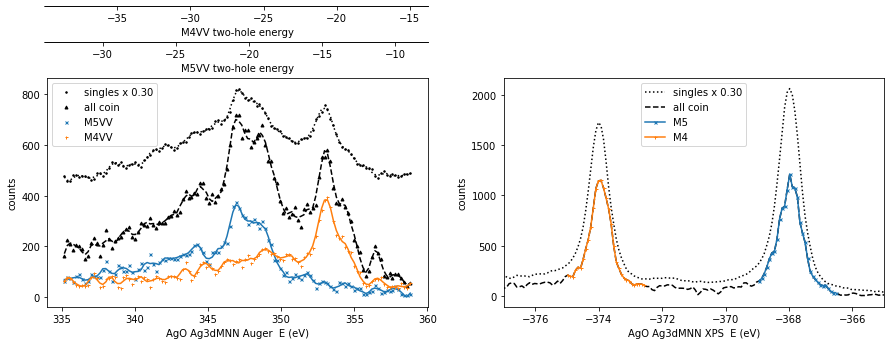

left: Auger, bin = 0.200 eV - right: PE, bin = 0.080 eV


In [4]:
df=dftrue.copy()

savgolwitdh=7
scale_singles =0.3
markersize=3
flag_plot_two_hole_energy_axes = True

# Ag3dMNN_plotOverviewMap_PESandAugerSpectra.py
exec(open(ScriptFolderAg3d+"Ag3dMNN_PESandAugerSpectra_noBackground.py").read())

# try to subtract shirley background for the augers

# a scaled copy of blue Auger (M5VV - 3d5/2) is part of the orange Auger (M4VV - 3d3/2).
# 3d ratio for M5VV (red) is closer to one, becuae it is 3d5/2 auger + 3d3/2 loss-Auger
# .   unfortunately not helpful for disentangling

# CK process cross-section is neglibly small

# olive '3d3/2to5/2' is Auger spectrum in between the two PES peaks and stems from 3d5/2(M5) photoelectrons 
# .   with losses on the way out in coincidence with M5 Auger -m hence it M5 Auger can appear
#       in coin with M5 imitiating M4 photoelectron
#   =>  hence part of M5 Auger spec appears in window of M4

### blue Auger spectrum (M5VV in coin with 3d5/2) is intrinsically correct

# Auger:blue=M5VV(3d5/2) ==> >344eV:band-like component (see: Lund+Thurgate)
# .  ===>>> M5 Auger is naturally in M4 Auger region, see band-like

# Nils will state what are the best literatuere values Auger energies
# shift spectra to match literature values / check stretch

# PES peaks at: 373.8(3)eV & 367.8(4) => delta = 6 eV  
# M4/5 two hole binding energy is given by M4/5_PE_energy - AugerEnergyAxis 



### Fig. 6a: The M4 coincidence Auger spectrum AND scaled down M5 ANNd difference M4-M5
### Fig. 6b:The coincidence Auger spectra plotted with two-hole binding energy axis

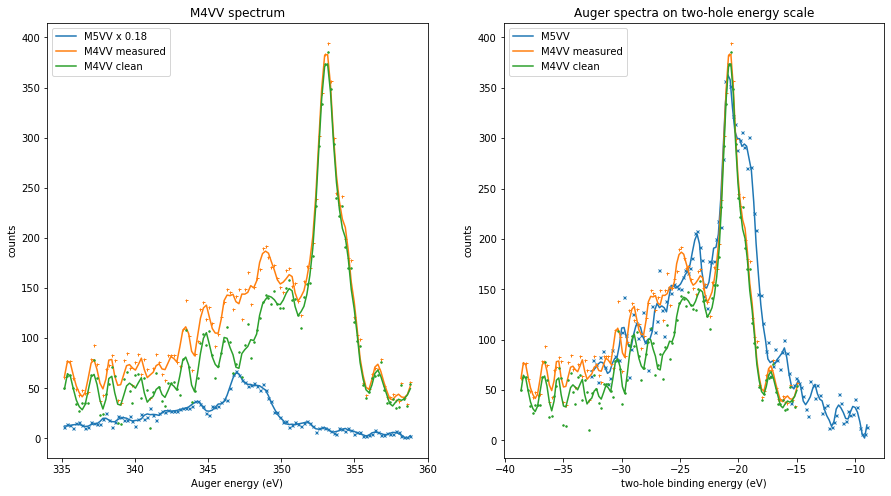

In [5]:
# energy shift between Auger energy axis and two-hole binding energy axis
TwoHoleBindingEnergyOffset={'M4':373.8, 'M5':367.8}
#
# from "Supporting Fit for Fig6" further down.
M5scale=0.18
M4cleancolor='tab:green'
#
exec(open(ScriptFolderAg3d+'Ag3dMNN_M4_AND_TwoHoleAx.py').read())

#### (left)
The M5 (3d5/2) electron binding energy is lower than that of the M4 (3d3/2) electrons, hence the M5 photoelectrons have the higher kinetic energy. A fraction of the photoelectrons will loose kinetic energy on their way out and some of them will have a measured kinetic energy equal to energy where M4 (3d3/2) photoelectrons are expected, but the Auger electron measured in coincidence will still stem from a M5VV Auger transistion. 
This cannot happen the other way round, since the M4 electrons would have to gain energy on their way out to appear at the M5 energy.

Therefore the Auger spectrum extracted from the M5 region (blue) of true coincidences map can be considered the pure M5VV Auger spectrum, while the spectrum extracted from the M4 region has contributions from M4VV and M5VV transistions.

We can get an estimate for the relative amount of M5VV Auger contribtuion to the M4VV Auger spectrum from the background signal between the two regions. 
Therefore we sum the coincidence map along the Auger axis and fit the resulting XPS spectrum with two voigt profiles and a shirley type background.

This method overestimates the amount of M5 in the spectrum, since we assume a constant height of the M5 XPS loss spectrum below the M5 peak. In reality the contributions from losses decrease with increasing binding energy. However, so far I could come up with no idea to justify any definite value forna slope to describe the decrease of the background from M5 losses with respect to the binding energy.

The fit yields a content of 18% M5 in M4. By eye, a content of only 13% M5 in M4 looks very reasonable, too.
The resulting M4 spectrum shows visible changes only for Auger energies below approx. 359 eV. 


#### (right)
Auger spectra for the two-hole binding energy axis, which is the difference between Auger energy and XPS binding energy of a coincident event.

The shoulder on the low binding energy side (right) is a lot stronger in M5 (blue) than in M4 (green/orange).

The high binding energy side (left) is roughly equal, when one considers to huge uncertainty in in the M4 estimation.

### Fit Ag 3d peaks

use scipy.optimize package

### Supporting Fit for Fig6: Estimate amount of M5VV electrons in M4 Auger spectrum

all_coins
Ratio of Areas Peak2/Peak1 = 0.945 +/- 0.015


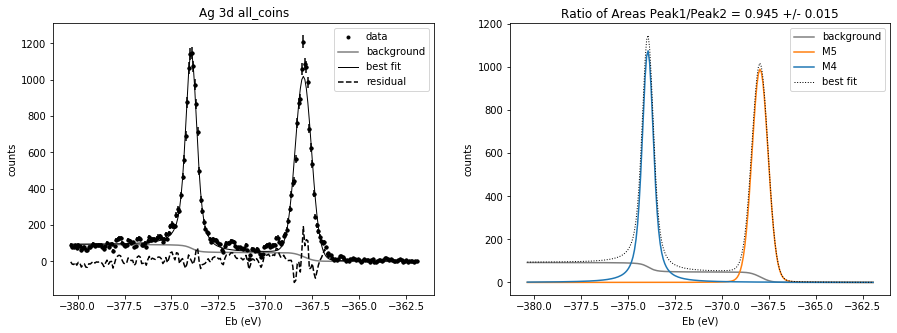

M4 PES Height: 1134.3 , BG between M4&M5: 56.1
 ==> M5 content in M4: M5scale = M4height/BG = 20.23


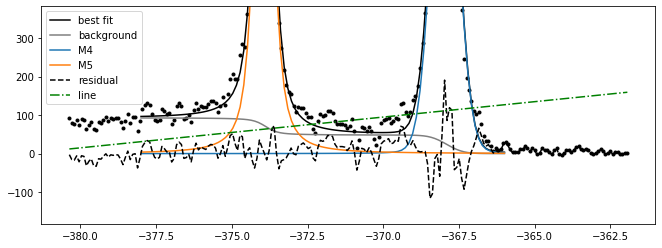

In [6]:
### ### ### ### ### ### ### ### ### ### ### ###
### PES Datasets to be fitted               ###
### ### ### ### ### ### ### ### ### ### ### ###
datdict={}
#datdict["singles"]=singles
datdict["all_coins"]=fulltrue
### ### ### ### ### ### ### ### ### ### ### ###
peak1_pos=-367.8   ;  label_peak1 = 'M5'
peak2_pos=-373.8   ;  label_peak2 = 'M4'
flag_show_plots     =True
flag_show_fitparams =False
flag_estimate_M5inM4=True
flag_plot_BGzoom    =True
exec(open(ScriptFolderAg3d+'Ag3dMNN_FitPES.py').read())